In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Importing csv file from your device to Google colab

### Comment that part if you are running it on Jupyter Notebook

In [2]:
# #Importing csv file in google colab from your device
# from google.colab import files #step 1 import files module form google.colab library
# import io

In [3]:
# uploaded = files.upload() #for uploading to google colab

In [4]:
## importing csv file into pandas dataframe
# df = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']),delimiter=';')
# df.head()

# Importing csv file into pandas dataframe

### Comment that part if you are running it on Google colab

In [5]:
#Comment that part if you are running it on Google colab
df = pd.read_csv('cardio_train.csv',delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Dropping the id column because it doesn't add much information to data

By dropping it, it also help us in finding the duplicates in dataset.

In [6]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data exploration and visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


It shows that there is total of 70,000 rows, no null values and not any object type columns to deals with.

In [8]:
df.describe().transpose()
#height,weight,bood pressure ap_hi and ap_low has some outliers.

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


After using this method we found out there are <b>negative values in ap_hi and ap_lo</b> columns and<br>
<b>outliers in height, weight, ap_hi, ap_lo columns</b>.<br>
We deals with them in cleaning part.

## Distribution of dependent variable

In [9]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

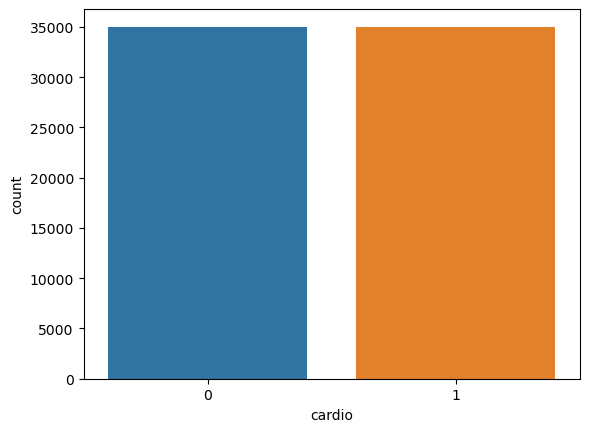

In [10]:
sns.countplot(x='cardio',data=df)

It shows that the cardio column is equally distributed.

## Checking distribution (distplot) and outliers (boxplot) in height and weight columns

### Height Distribution

/tmp/ipykernel_17402/2013041522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['height'])


<Axes: ylabel='Density'>

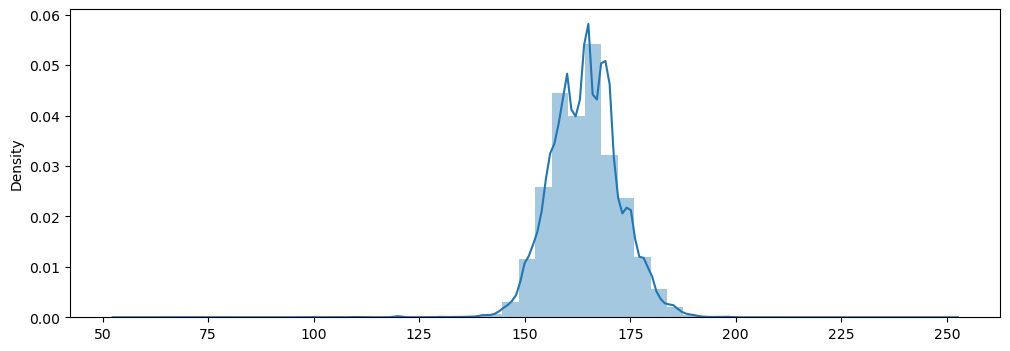

In [11]:
plt.figure(figsize=(12,4))
sns.distplot(x=df['height'])

### Height Outliers

<Axes: xlabel='Height', ylabel='Estimated Outliers Distribution'>

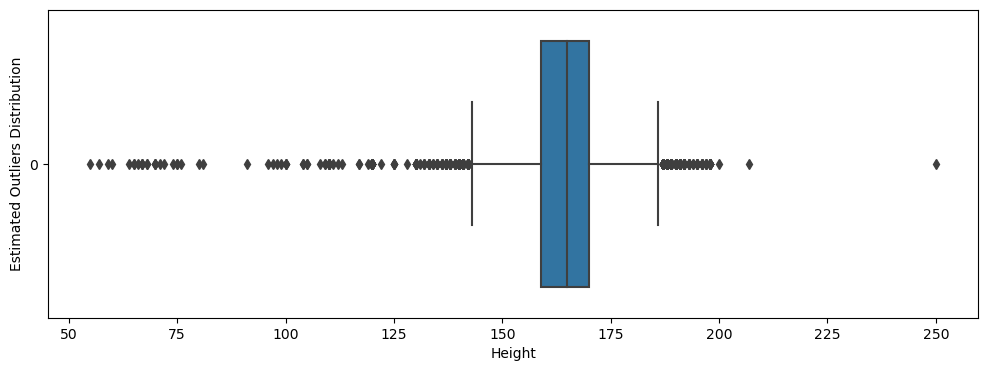

In [12]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution")
plt.xlabel("Height")
sns.boxplot(df['height'],orient='h')

### Weight Distribution

/tmp/ipykernel_17402/3552944591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['weight'])


<Axes: ylabel='Density'>

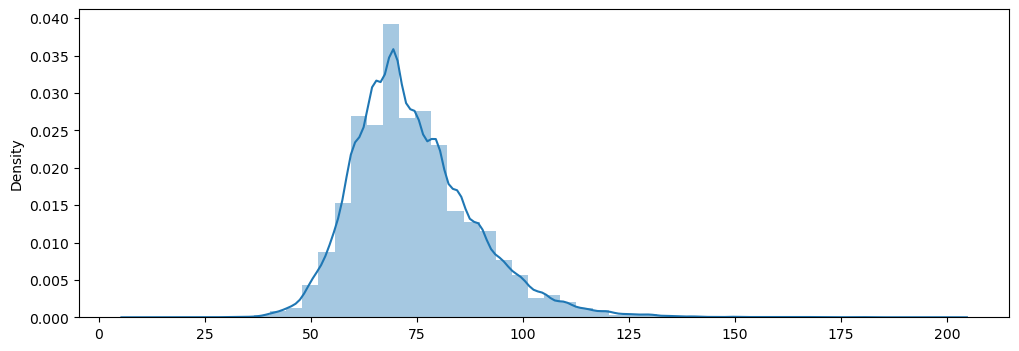

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(x=df['weight'])

### Weight Outliers

<Axes: xlabel='Weight', ylabel='Estimated Outliers Distribution'>

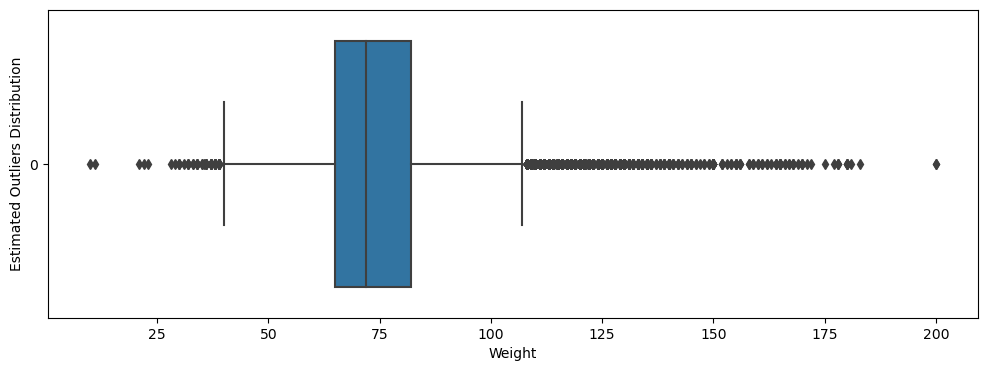

In [14]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution")
plt.xlabel('Weight')
sns.boxplot(df['weight'],orient='h')

## Exloring Gender column

By average height of gender catgorical values (1,2) we found out that <b>1:Woman, 2:Man</b>.<br>
Because average height of men are greater than women.

In [15]:
print("Women :\n",df[df['gender']==1][['height','weight']].mean())
print("Men :\n",df[df['gender']==2][['height','weight']].mean(),'\n')
print('Percentage of Men and Women\n1 for Women and 2 for men :')
print(df['gender'].value_counts()/df['gender'].count()*100)

Women :
 height    161.355612
weight     72.565605
dtype: float64
Men :
 height    169.947895
weight     77.257307
dtype: float64 

Percentage of Men and Women
1 for Women and 2 for men :
1    65.042857
2    34.957143
Name: gender, dtype: float64


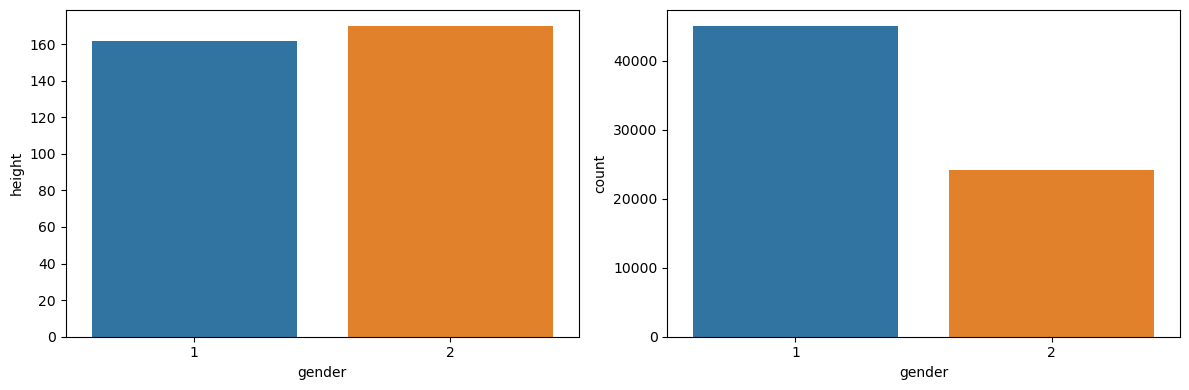

In [128]:
f,axes = plt.subplots(1,2)

plt.rcParams["figure.figsize"] = [12.00, 4.00]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=df['gender'],y=df['height'],ax=axes[0])
sns.countplot(x=df['gender'],ax=axes[1])
plt.show()

In dataset <b>value count of women are greater than men</b>.

## Checking varibles which affects cardio

by checking cholesterol and glucose level count with respect to the cardio,<br>we found out that those who has normal cholesterol and glucose have slightly lower chance of cardio disease,<br>while those has heigher cholesterol and glucose have slightly heigher chance of disease.

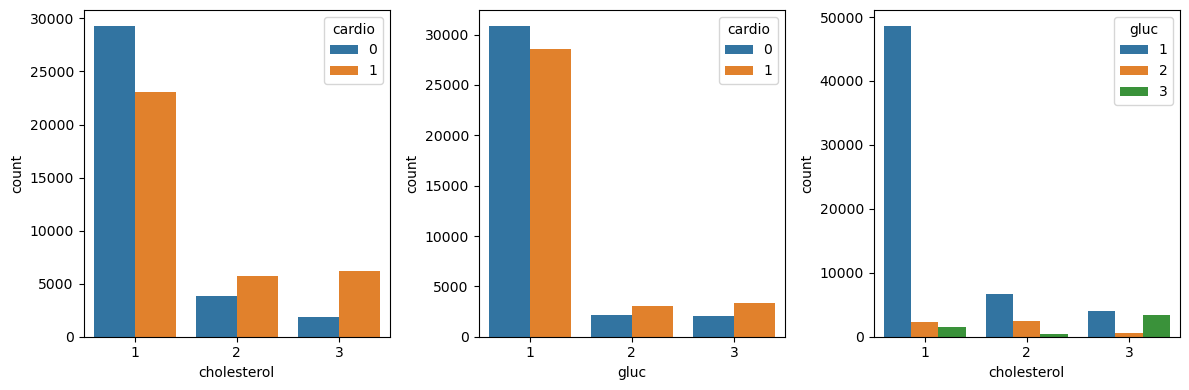

In [17]:
f,axes = plt.subplots(1,3)

sns.countplot(x='cholesterol',hue='cardio',data=df,ax=axes[0])
sns.countplot(x='gluc',hue='cardio',data=df,ax=axes[1])
sns.countplot(x=df['cholesterol'],hue=df['gluc'],ax=axes[2])
plt.show()

### Correlation between Cholesterol and Glucose levels

<Axes: >

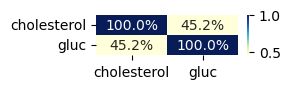

In [18]:
plt.figure(figsize=(3,1))
sns.heatmap(df[['cholesterol','gluc']].corr(),annot=True,fmt='.1%',cmap="YlGnBu")

## Finding outliers in ap_hi and ap_lo using boxplot

<Axes: xlabel='Systolic Blood Pressure', ylabel='Estimated Outliers Distribution'>

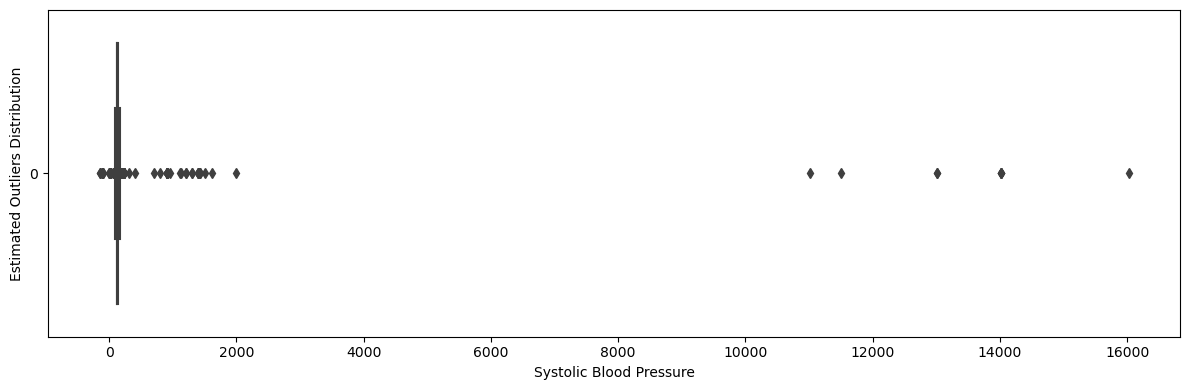

In [19]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution")
plt.xlabel('Systolic Blood Pressure')
sns.boxplot(df['ap_hi'],orient='h')

<Axes: xlabel='Systolic Blood Pressure', ylabel='Estimated Outliers Distribution'>

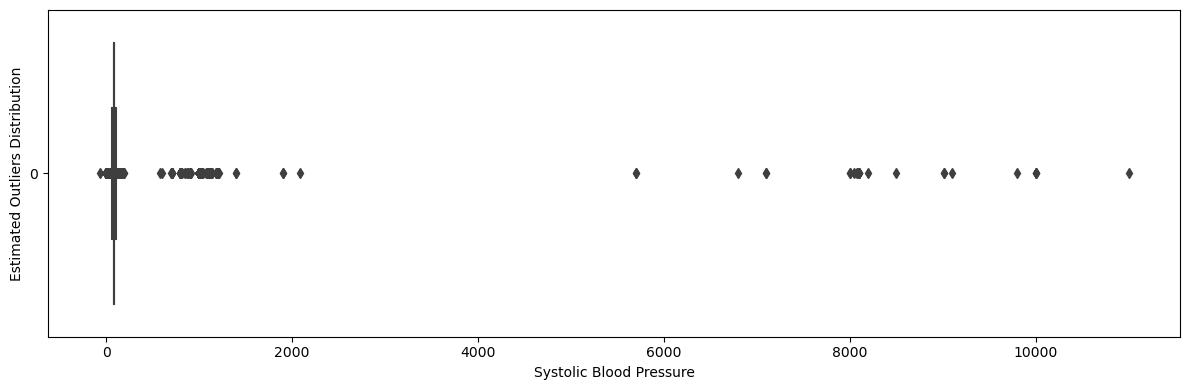

In [20]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution")
plt.xlabel('Systolic Blood Pressure')
sns.boxplot(df['ap_lo'],orient='h')

# Cleaning of data

## Checking and removing duplicate row values

In [21]:
sum(df.duplicated())

24

In [22]:
#removing duplicate values
df = df.drop_duplicates()
sum(df.duplicated())

0

## Removing outliers form the systolic, dystolic blood pressure ap_hi, ap_lo

Highest recorded blood pressure is <b>390/360</b> in 1995. But systolic pressure above 180 mm Hg and dystolic pressure above 100 implies a critical medical condition.
So we range it between <b>240/140</b> is extremly high condition called <b>hypertension</b> which is a medical emergency.

<b>Lowest</b> recorded <b>blood pressure</b> is <b>90/60</b> causes a condition called <b>Hypotension</b>.

Highest <b>ap_hi</b> is <b>240</b> and Lowest <b>ap_hi</b> is <b>90</b>.
<br>
highest <b>ap_lo</b> is <b>140</b> and Lowest <b>ap_lo</b> is <b>60</b>.<br>
Values outside of these limits are considered as outliers.

### Removing outliers from ap_hi

In [23]:
# Checking mean, median, min and max value of ap_hi before cleaning
df['ap_hi'].describe()

count    69976.000000
mean       128.820453
std        154.037729
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [24]:
# Checking unique values.
df['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [25]:
# Removing negative values
df['ap_hi'] = df['ap_hi'].abs()
df['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
         909,   109,    85,   106,   129,    93,     7,    95,   179,
         156,   168,   132,   104,   103,   178,   175,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,   111,   907,    20,
         188,   185,   163,   173,   154,   177,   174, 14020,  1400,
         240,   191,   197,  1620,   152,    96,   199,  1130,   193,
          99,   196,

In [26]:
# Cheking no. of outlier ap_hi containing for both upper and lower limit.
print("ap_hi is greater than 240 is: ",sum(df['ap_hi']>240))
print("ap_hi is less than 90 is: ",sum(df['ap_hi']<90))

ap_hi is greater than 240 is:  40
ap_hi is less than 90 is:  314


we requires a two <b>functions</b> first <b>to reduce the no. of digits to 2 or 3</b>.<br>
Suppose a <b>value 13010 or 14020</b> from ap_hi or ap_lo, <b>it could be 130 or 140</b>.<br>
The second fuction <b>to reduce one digit from values that are under 1000 and greater than 250</b> (greater than highest limit in both ap_hi and ap_lo).<br>
Suppose a <b>value 907 or 806</b> from ap_hi or ap_lo, <b>it could be 90 or 80</b>.

In [27]:
def digit_reducer(x):
  """fuction used to reduce the number of digits to 2 or 3."""
  if (np.log10(x)>=4):
    return(x//100)
  elif (np.log10(x)>=3):
    return(x//10)
  elif ((np.log10(x)<2) & (x<30)):
    return(x*10)
  else:
    return x

def upper_hand(x):
  """function used to reduce one digit if data is greater than upper_bound"""
  if ((x>250)&(x<1000)):
    return(x//10)
  else:
    return x

In [28]:
# applying both fuctions to dataset's ap_hi column.
df['ap_hi'] = df['ap_hi'].apply(digit_reducer)
df['ap_hi'] = df['ap_hi'].apply(upper_hand)
df['ap_hi'].unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200, 123,  70, 161, 147, 115,
       137, 153, 148, 105, 220, 119, 141, 165, 164, 124, 172, 162, 117,
       134, 166, 210, 176, 116, 121, 112, 159, 113, 118, 155, 142, 131,
       157, 136, 146, 138, 109,  85, 106, 129,  93,  95, 179, 156, 168,
       132, 104, 103, 178, 175, 128, 151, 139, 127, 108, 144, 102,  10,
       143, 107, 184, 149, 167, 114, 101,  60, 181, 171, 202, 111, 188,
       185, 163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,
        99, 196,  30,  40, 230, 207, 215,  97, 195, 187])

In [29]:
# These are values are considered as true outliers.
print("ap_hi is greater than 240 is: ",sum(df['ap_hi']>240))
print("ap_hi is less than 90 is: ",sum(df['ap_hi']<90))

ap_hi is greater than 240 is:  0
ap_hi is less than 90 is:  140


In [30]:
# taking dataframe which has values in between 80,240(lower and upper bound)
df = df[df['ap_hi'].between(80,240)]

In [31]:
# Checking mean, min and max value of ap_hi after dealing with outliers.
df['ap_hi'].describe()

count    69951.000000
mean       127.017727
std         17.090752
min         80.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: ap_hi, dtype: float64

### Removing outliers ap_lo

In [32]:
# Checking mean, min and max value of ap_lo before cleaning
df['ap_lo'].describe()

count    69951.000000
mean        96.583437
std        188.311072
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [33]:
# Checking unique values.
df['ap_lo'].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,    20,   802,  8000,
        1022,   850,   708,    57,   101,  9011,  1011,    64,  1007,
        1177,  7100,    45,   709,  8500,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [34]:
# Removing negative values
df["ap_lo"]=df["ap_lo"].abs()
df["ap_lo"].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,    20,   802,  8000,
        1022,   850,   708,    57,   101,  9011,  1011,    64,  1007,
        1177,  7100,    45,   709,  8500,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [35]:
# Cheking no. of outlier ap_lo containing for both upper and lower limit.
print("ap_lo is greater than 140 is: ",sum(df['ap_lo']>140))
print("ap_lo is less than 60 is: ",sum(df['ap_lo']<60))

ap_lo is greater than 140 is:  980
ap_lo is less than 60 is:  167


In [36]:
#checking 0 values.
sum(df['ap_lo']==0)

20

In [37]:
# Removing rows from dataset that contains 0 values in ap_lo
df=df[df["ap_lo"]!=0]
df["ap_lo"].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,    93,   105, 10000,    99,    77,    59,  8044,
         140,    92,  1044,   108,   125,   115,    68,    61,   106,
         102,    94,    66,    52,   170,    76,   160,    62,    96,
         130,   113,    67,  9100,    10,    88,   902,     8,   112,
         104,    71,    72,  1008,    98,    20,   802,  8000,  1022,
         850,   708,    57,   101,  9011,  1011,    64,  1007,  1177,
        7100,    45,   709,  8500,    58,  1110,  8099,  1088,   126,
        1077,  1120,     7,   103,  1125,   180,   121,  8100,   710,
        5700,  8079,  1111,  1003,     6,  1900,   809,   114,   801,
        1002,    53,   111,     1,   118,    56,   182,   810,     9,
        7099, 11000,

In [38]:
# Checking mean, median, min and max
df['ap_lo'].describe()

count    69931.000000
mean        96.613061
std        188.329887
min          1.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [39]:
# applying both functions to dataset's ap_lo column.
df["ap_lo"]=df["ap_lo"].apply(digit_reducer)
df['ap_lo'] = df['ap_lo'].apply(upper_hand)
df["ap_lo"].unique()

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 120,  50,
        30, 109,  84, 103, 150,  91,  40,  73,  78,  75,  86,  87,  82,
        95,  69,  74,  97,  81,  83, 119,  93, 105,  99,  77,  59, 140,
        92, 104, 108, 125, 115,  68,  61, 106, 102,  94,  66,  52, 170,
        76, 160,  62,  96, 130, 113,  67,  88, 112,  71,  72,  98, 200,
        57, 101,  64, 117,  45,  58, 111, 126, 107, 180, 121, 190, 114,
        53,  10, 118,  56, 182,  55, 122, 135,  54,  49])

In [40]:
# These are values are considered as true outliers.
print("ap_lo is greater than 140 is: ",sum(df['ap_lo']>140))
print("ap_lo is less than 60 is: ",sum(df['ap_lo']<60))

ap_lo is greater than 140 is:  47
ap_lo is less than 60 is:  121


In [41]:
df=df[df["ap_lo"].between(60,140)]

In [42]:
# Checking mean, min and max value of ap_lo after dealing with outliers.
df['ap_lo'].describe()

count    69763.000000
mean        81.668148
std          9.708219
min         60.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        140.000000
Name: ap_lo, dtype: float64

In [43]:
df.shape

(69763, 12)

## Adding Pluse Pressure into dataset

<b>Pulse pressure is the difference between the upper and lower numbers of your blood pressure</b>.<br>
It helps us to manage relationship between ap_hi and ap_lo.<br>
<b>for example,</b> the <b>normal blood pressure is 120-80 mmHg</b>. The <b>pulse pressure of that is 40</b> which is also normal.<br>
for outlier values <b>if ap_hi is less then ap_lo, then pulse pressure become negative</b> which is not possible,<br>or <b>if the difference is too high like if blood pressure 200-80 mmHg then pulse pressure become 120</b> which is not possible, then it also considered as outlier.

In [44]:
# adding pulse pressure to dataset
df['pulse_pressure'] = df['ap_hi']-df['ap_lo']

A normal pulse pressure range is between 40 and 60 mm Hg.<br>
<b>99.7%</b> of values are within
<b>3 standard deviations</b> of the mean.The range with mean+ - 3 std is <b>10-80</b><br>.
whereas a <b>pulse pressure</b> of greater than <b>100</b> is high or widened.<br>
So we ranged the pluse pressure between <b>10 and 120 mm Hg</b>.

In [45]:
# finding the normal range of pulse pressure in dataset using standard deviation mean + - 3*std.
print(df['pulse_pressure'].mean() + (df['pulse_pressure'].std() * 3))
print(df['pulse_pressure'].mean() - (df['pulse_pressure'].std() * 3))

81.50752516745749
9.242700596916187


In [46]:
# checking the no. of outliers in pulse_pressure.
print('pulse pressure greater than 120 is: ',sum(df['pulse_pressure']>120))
print('pulse pressure lower than 20 is: ',sum(df['pulse_pressure']<10))

pulse pressure greater than 120 is:  11
pulse pressure lower than 20 is:  76


In [47]:
# checking the mean, median, min, max in pulse pressure  before cleaning
df['pulse_pressure'].describe()

count    69763.000000
mean        45.375113
std         12.044137
min        -60.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        140.000000
Name: pulse_pressure, dtype: float64

In [48]:
# checking unique values
df['pulse_pressure'].unique()

array([ 30,  50,  60,  40,  45,  90,  35,  55,  70,  44, 100,  61,  57,
        20,  10,  41,  80,  42,  47,  67,  43,  51,  88,  62,  63,  66,
        65,  58,  76,  39,  59,  91,  85,  37,  31,  53,  72,  27,  73,
        33, 110,  38,  71,  25, -60,  15,  36,  32,  34,  21, -45, -40,
        18,  89,  49,  48, -50,  23,  97, -35,  75,  79,  52,  69,  56,
        54,  46,  11,  78,  64,  68,  95, -10,  84, 130,  96,  81,  24,
         0,  87,  94,  82, 120,  93, 121, 115,  77,  22,  98,  28,  83,
        12,   5,   9, 108,  86,  -5,  17,  29,  74,  14, 101,  99, -20,
       103, 107,  92, -30, 140, 105, -25, 135, 109, 106,  19])

In [49]:
# assigning the rows to dataset which contains values in between lower and upper bound.
df=df[df["pulse_pressure"].between(10,120)]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure
count,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000
mean,19470.108717,1.349676,164.362865,74.221231,127.075521,81.623586,1.366984,1.226376,0.088122,0.053548,0.803734,0.499756,45.451935
std,2467.066768,0.476871,8.210163,14.392999,16.958101,9.601007,0.680364,0.572173,0.283475,0.225125,0.397175,0.500004,11.677324
min,10798.000000,1.000000,55.000000,10.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000
75%,21328.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,120.000000


## Dealing with Weight and Height Outliers

### Dealing with weight oultiers

In [50]:
# checking mean, median, min, max of weight before cleaning
df['weight'].describe()

count    69676.000000
mean        74.221231
std         14.392999
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [51]:
# Setting upper and lower bounds using standard deviation (mean + - 3*std)
# Weight normal distribution is slightly right skewed. So, upper bound = (mean + 4*std)
weight_mean = df['weight'].mean()
weight_std = df['weight'].std()
weight_upper_outlier = weight_mean + (weight_std * 4)
weight_lower_outlier = weight_mean - (weight_std * 3)
print(weight_upper_outlier)
print(weight_lower_outlier)

131.79322859713267
31.04223302427863


In [52]:
# Checking the number of outliers in weight, both upper and lower
print("Number of Upper Outliers is:",sum(df["weight"]>weight_upper_outlier))
print("Number of Lower Outliers is:",sum(df["weight"]<weight_lower_outlier))

Number of Upper Outliers is: 189
Number of Lower Outliers is: 11


In [53]:
# assigning the rows to dataset which contains values in between lower and upper bound.
df = df[df['weight'].between(weight_lower_outlier,weight_upper_outlier)]

<b>Other ways to get the same result is:</b><br>
<b>df[np.abs((df['weight']-weight_mean)/weight_std)<3]</b><br><br>
<b>import scipy.stats as st</b> <br>
<b>df[np.abs(st.zscore(df['weight']))<3]</b>

In [54]:
# checking weight discription after dealing with outliers
df['weight'].describe()

count    69476.000000
mean        74.029744
std         13.860114
min         32.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        131.000000
Name: weight, dtype: float64

### Dealing with Height Outliers

In [55]:
# checking mean, median, min, max of weight before cleaning
df['height'].describe()

count    69476.000000
mean       164.358455
std          8.166380
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [56]:
# Setting upper and lower bounds using standard deviation (mean + - 3*std)
height_mean = df['height'].mean()
height_std = df['height'].std()
height_upper_outlier = height_mean + (height_std * 3)
height_lower_outlier = height_mean - (height_std * 3)
print(height_upper_outlier)
print(height_lower_outlier)

188.85759420950717
139.85931522684496


In [57]:
# It is possible for people to have height more than 188.So, I want to increase the limit of height_upper_outlier.
height_upper_outlier = height_upper_outlier + 5

In [58]:
# Checking the number of outliers in height, both upper and lower
print("Number of Upper Outliers is:",sum(df["height"]>height_upper_outlier))
print("Number of Lower Outliers is:",sum(df["height"]<height_lower_outlier))

Number of Upper Outliers is: 34
Number of Lower Outliers is: 139


In [59]:
# assigning the rows to dataset which contains values in between lower and upper bound.
df = df[df['height'].between(height_lower_outlier,height_upper_outlier)]

# Data exploration after cleaning

In [60]:
# checking the shape of data
df.shape

(69303, 13)

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,69303.0,19471.456733,2466.566750,10798.0,17668.0,19705.0,21328.0,23713.0
gender,69303.0,1.349393,0.476782,1.0,1.0,1.0,2.0,2.0
height,69303.0,164.438625,7.774459,140.0,159.0,165.0,170.0,193.0
weight,69303.0,74.033186,13.853247,32.0,65.0,72.0,82.0,131.0
ap_hi,69303.0,127.039854,16.926393,80.0,120.0,120.0,140.0,240.0
ap_lo,69303.0,81.605948,9.583725,60.0,80.0,80.0,90.0,140.0
cholesterol,69303.0,1.366680,0.680220,1.0,1.0,1.0,2.0,3.0
gluc,69303.0,1.225748,0.571529,1.0,1.0,1.0,1.0,3.0
smoke,69303.0,0.088005,0.283304,0.0,0.0,0.0,0.0,1.0
alco,69303.0,0.053446,0.224924,0.0,0.0,0.0,0.0,1.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69303 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             69303 non-null  int64  
 1   gender          69303 non-null  int64  
 2   height          69303 non-null  int64  
 3   weight          69303 non-null  float64
 4   ap_hi           69303 non-null  int64  
 5   ap_lo           69303 non-null  int64  
 6   cholesterol     69303 non-null  int64  
 7   gluc            69303 non-null  int64  
 8   smoke           69303 non-null  int64  
 9   alco            69303 non-null  int64  
 10  active          69303 non-null  int64  
 11  cardio          69303 non-null  int64  
 12  pulse_pressure  69303 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.4 MB


In [63]:
# value counts of cadio. column after cleaning
df['cardio'].value_counts()

0    34713
1    34590
Name: cardio, dtype: int64

## checking outliers after cleaning

<Axes: xlabel='Height', ylabel='Estimated Outliers Distribution'>

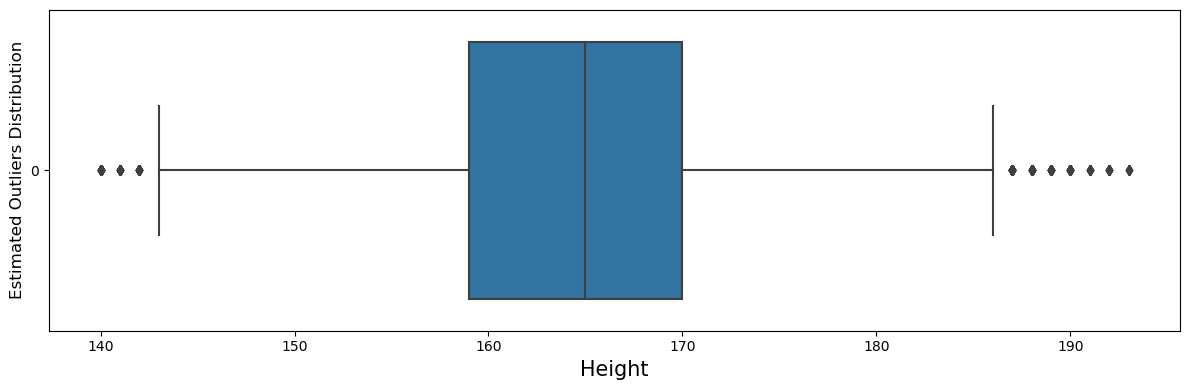

In [64]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution",{"size":12})
plt.xlabel('Height',{"size":15})
sns.boxplot(df['height'],orient='h')

<Axes: xlabel='Weight', ylabel='Estimated Outliers Distribution'>

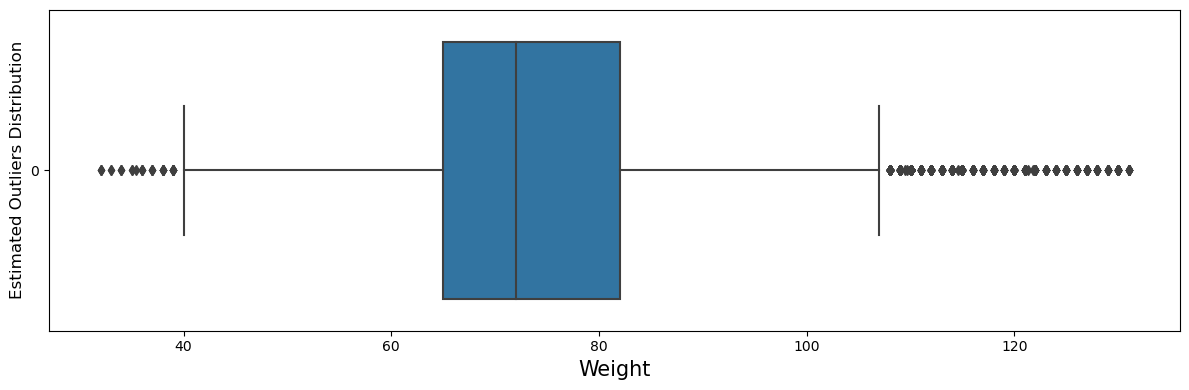

In [65]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution",{"size":12})
plt.xlabel('Weight',{"size":15})
sns.boxplot(df['weight'],orient='h')

<Axes: xlabel='Systolic Blood Pressure ap_hi', ylabel='Estimated Outliers Distribution'>

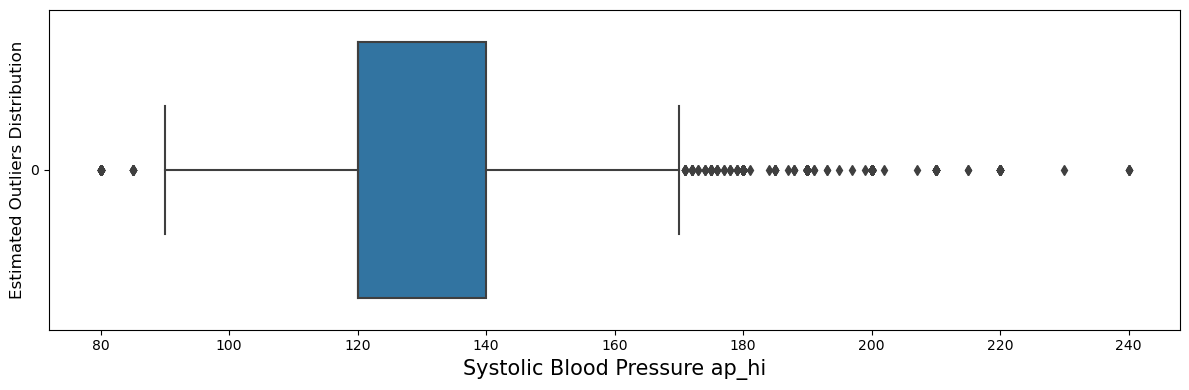

In [66]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution",{"size":12})
plt.xlabel('Systolic Blood Pressure ap_hi',{"size":15})
sns.boxplot(df['ap_hi'],orient='h')

<Axes: xlabel='Dystolic Blood Pressure ap_lo', ylabel='Estimated Outliers Distribution'>

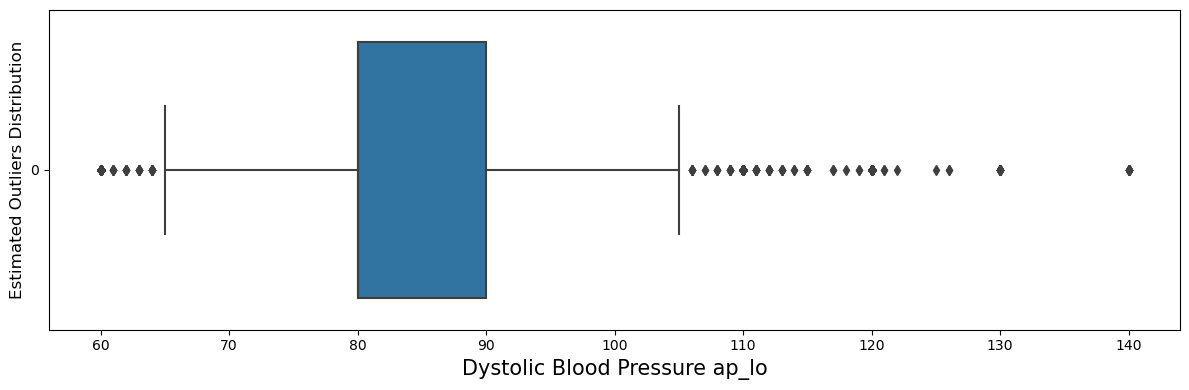

In [67]:
plt.figure(figsize=(12,4))
plt.ylabel("Estimated Outliers Distribution",{"size":12})
plt.xlabel('Dystolic Blood Pressure ap_lo',{"size":15})
sns.boxplot(df['ap_lo'],orient='h')

## Checking relationship between cardio and different columns under specific conditions

peoples who has weight above average have slightly higher chance of cardio disease 

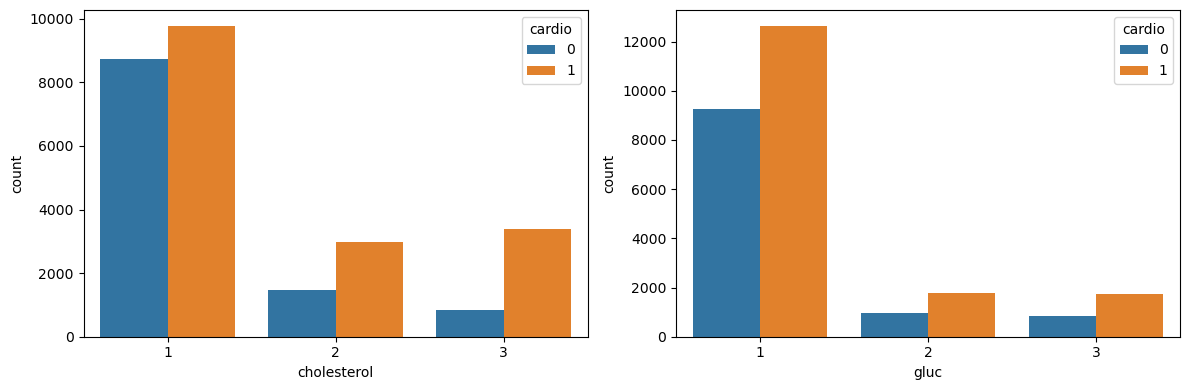

In [68]:
f,axes = plt.subplots(1,2)

sns.countplot(x='cholesterol',hue='cardio',data=df[df['weight']>75],ax=axes[0])
sns.countplot(x='gluc',hue='cardio',data=df[df['weight']>75],ax=axes[1])
plt.show()

## Heatmap of dataframe 

<Axes: >

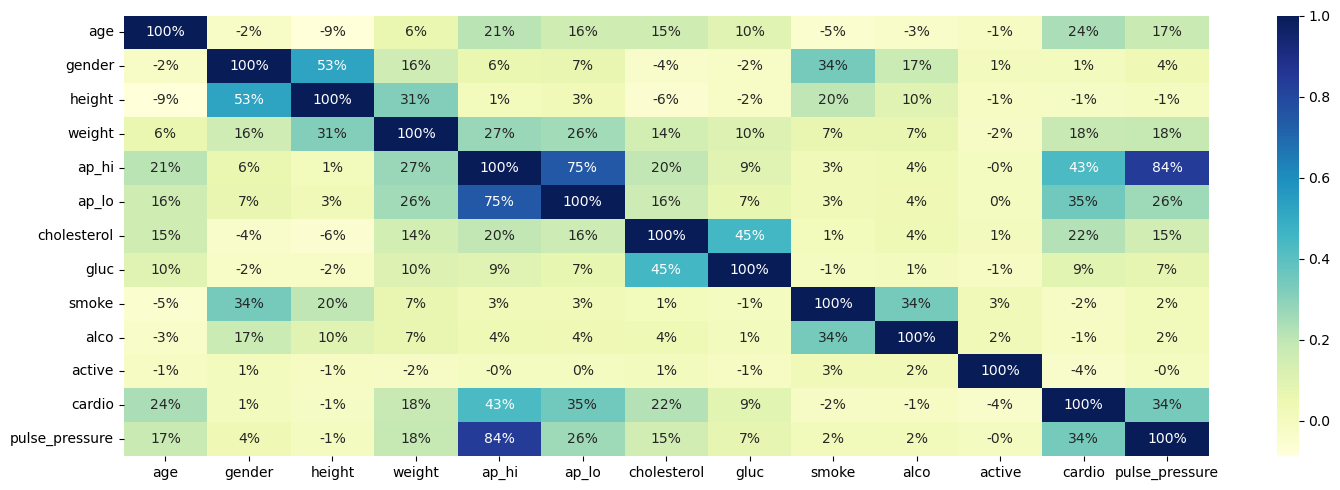

In [69]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt='.0%') # fmt='.%' shows percentage

# Training the model

## Spliting the dataset into train and test

In [70]:
# taking every column into X except Cardio
X = df.drop(['cardio'],axis=1)

In [71]:
X.shape

(69303, 12)

In [72]:
# taking cardio column into y
y = df['cardio']

In [73]:
# Spliting the data into train,test
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [75]:
X_train.shape,X_test.shape

((51977, 12), (17326, 12))

## Decision Tree Model

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_tree_pred = dtree_model.predict(X_test)

<Axes: >

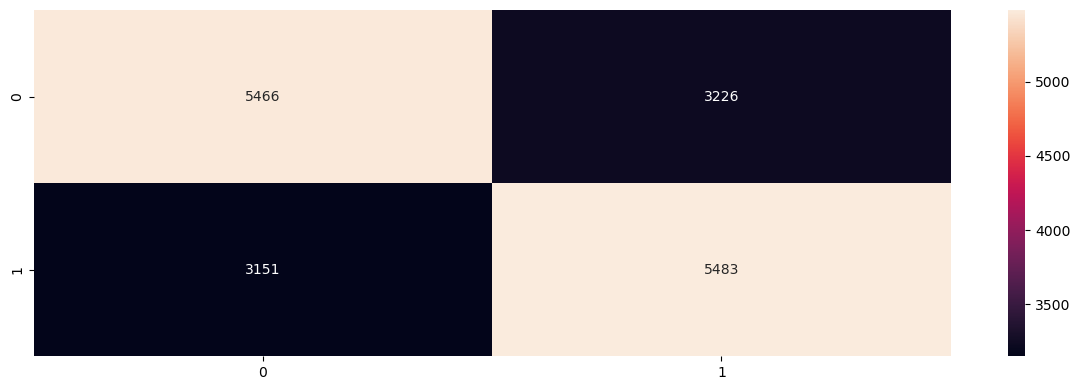

In [79]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_tree_pred),annot=True,fmt='d')

In [80]:
print('Decision Tree Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_tree_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_tree_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(y_tree_pred,y_test))

Decision Tree Classifier

 Confusion Matrix : 
 [[5466 3226]
 [3151 5483]]
Accuracy Score :  0.6319404363384509
Accuracy in Percentage :  63 %

               precision    recall  f1-score   support

           0       0.63      0.63      0.63      8617
           1       0.64      0.63      0.63      8709

    accuracy                           0.63     17326
   macro avg       0.63      0.63      0.63     17326
weighted avg       0.63      0.63      0.63     17326



## Random Forest Model

In [81]:
# Importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Creating Random Forest object
rf_model = RandomForestClassifier()

In [83]:
# Training the model
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
# Making prediction from the model
y_rf_pred = rf_model.predict(X_test)

In [85]:
# Creating confusion matrix
metrics.confusion_matrix(y_test,y_rf_pred)

array([[6379, 2313],
       [2587, 6047]])

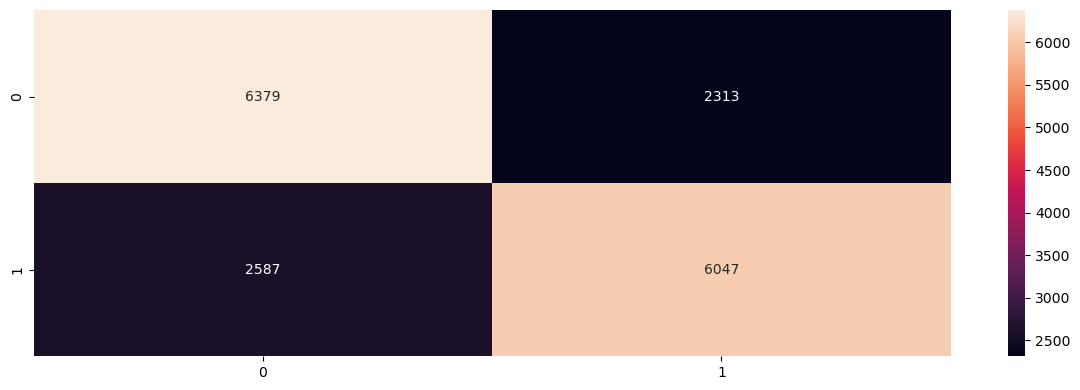

In [86]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_rf_pred),annot=True,fmt='d') # fmt='d' shows integer value.
plt.show()

In [87]:
print('Random Forest Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_rf_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_rf_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(y_rf_pred,y_test))

Random Forest Classifier

 Confusion Matrix : 
 [[6379 2313]
 [2587 6047]]
Accuracy Score :  0.7171880410943091
Accuracy in Percentage :  71 %

               precision    recall  f1-score   support

           0       0.73      0.71      0.72      8966
           1       0.70      0.72      0.71      8360

    accuracy                           0.72     17326
   macro avg       0.72      0.72      0.72     17326
weighted avg       0.72      0.72      0.72     17326



## Gaussian Naive Bayes Model

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
naive_model = GaussianNB()
naive_model.fit(X_train,y_train)

GaussianNB()

In [90]:
y_naive_pred = naive_model.predict(X_test)

<Axes: >

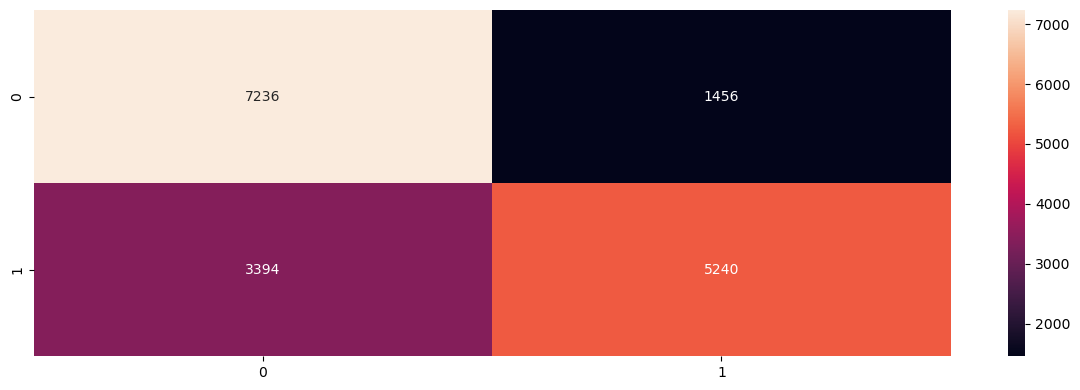

In [91]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_naive_pred),annot=True,fmt='d')

In [92]:
print('Gussian NB Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_naive_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_naive_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(y_naive_pred,y_test))

Gussian NB Classifier

 Confusion Matrix : 
 [[7236 1456]
 [3394 5240]]
Accuracy Score :  0.7200738774096733
Accuracy in Percentage :  72 %

               precision    recall  f1-score   support

           0       0.83      0.68      0.75     10630
           1       0.61      0.78      0.68      6696

    accuracy                           0.72     17326
   macro avg       0.72      0.73      0.72     17326
weighted avg       0.75      0.72      0.72     17326



#### Decision trees, Random Forest, AdaBoost, Naïve Bayes does not require feature scaling

## Feature Scaling of data

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [96]:
X_train_scaled.shape,X_test_scaled.shape

((51977, 12), (17326, 12))

In [97]:
X_test_scaled

array([[-0.83463702, -0.72979189,  0.59025323, ..., -0.23694181,
        -2.05317627,  0.3922872 ],
       [ 0.97016638,  1.37025366,  0.33319371, ..., -0.23694181,
         0.48705024, -0.46827015],
       [-0.81471914, -0.72979189,  0.07613419, ..., -0.23694181,
         0.48705024,  1.25284455],
       ...,
       [ 1.27177992, -0.72979189,  0.46172347, ..., -0.23694181,
         0.48705024, -0.46827015],
       [ 0.3669393 , -0.72979189,  0.07613419, ..., -0.23694181,
         0.48705024,  0.3922872 ],
       [ 1.03317191,  1.37025366,  0.33319371, ..., -0.23694181,
         0.48705024,  0.3922872 ]])

## Logistic Regression

In [98]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

In [99]:
# creating object from model
log_model = LogisticRegression()
# training the model by fitting the data
log_model.fit(X_train,y_train)

/home/aarav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
# making pridiction from the model
y_log_pred = log_model.predict(X_test)

<Axes: >

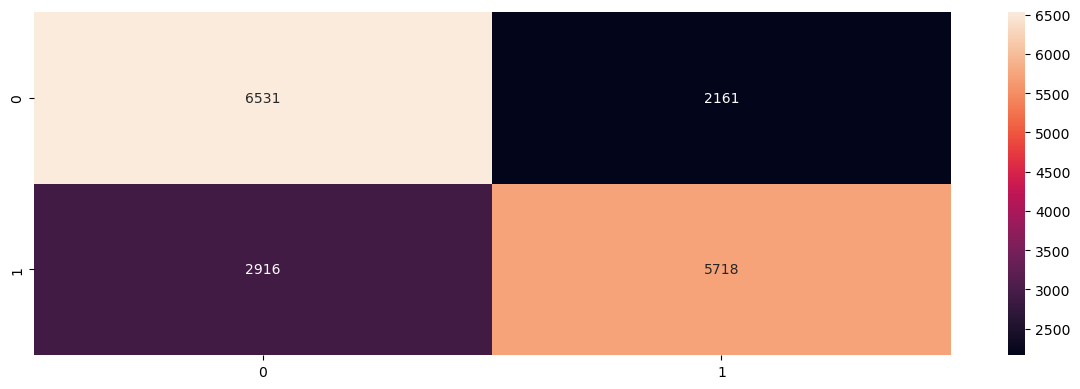

In [101]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_log_pred),annot=True,fmt='d')

In [102]:
print('LogisticRegression Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_log_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_log_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(y_log_pred,y_test))

LogisticRegression Classifier

 Confusion Matrix : 
 [[6531 2161]
 [2916 5718]]
Accuracy Score :  0.7069721805379199
Accuracy in Percentage :  70 %

               precision    recall  f1-score   support

           0       0.75      0.69      0.72      9447
           1       0.66      0.73      0.69      7879

    accuracy                           0.71     17326
   macro avg       0.71      0.71      0.71     17326
weighted avg       0.71      0.71      0.71     17326



## SVM Model

In [103]:
# importing the model
from sklearn.svm import SVC

In [104]:
# creating the object of model
svc_model = SVC()
# traing the model by fitting the data
svc_model.fit(X_train_scaled,y_train)

SVC()

In [105]:
# making prediction using the model
y_svc_pred = svc_model.predict(X_test_scaled)

<Axes: >

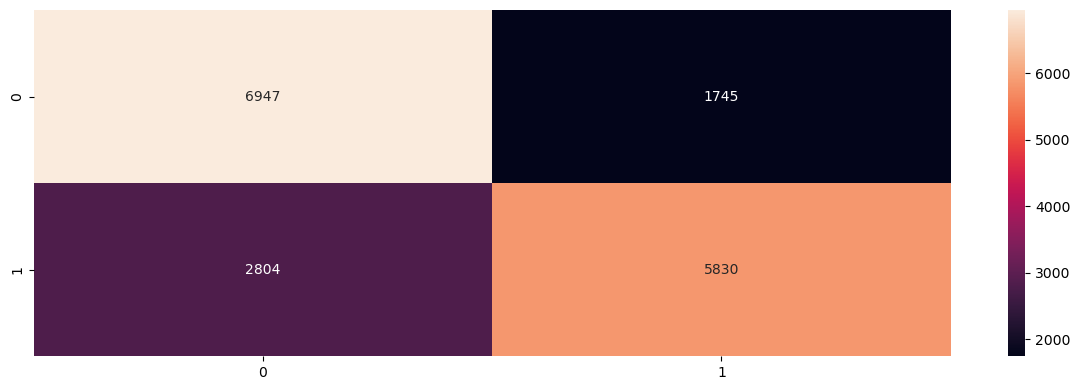

In [106]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_svc_pred),annot=True,fmt='d')

In [107]:
print('Support Vector Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_svc_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_svc_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(y_svc_pred,y_test))

Support Vector Classifier

 Confusion Matrix : 
 [[6947 1745]
 [2804 5830]]
Accuracy Score :  0.7374466120281657
Accuracy in Percentage :  73 %

               precision    recall  f1-score   support

           0       0.80      0.71      0.75      9751
           1       0.68      0.77      0.72      7575

    accuracy                           0.74     17326
   macro avg       0.74      0.74      0.74     17326
weighted avg       0.75      0.74      0.74     17326



## KNN Model

In [108]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [109]:
# creating object from model
knn_model = KNeighborsClassifier()
# trianing the model by fitting values
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [110]:
# making prediction using the model
y_knn_pred = knn_model.predict(X_test_scaled)

<Axes: >

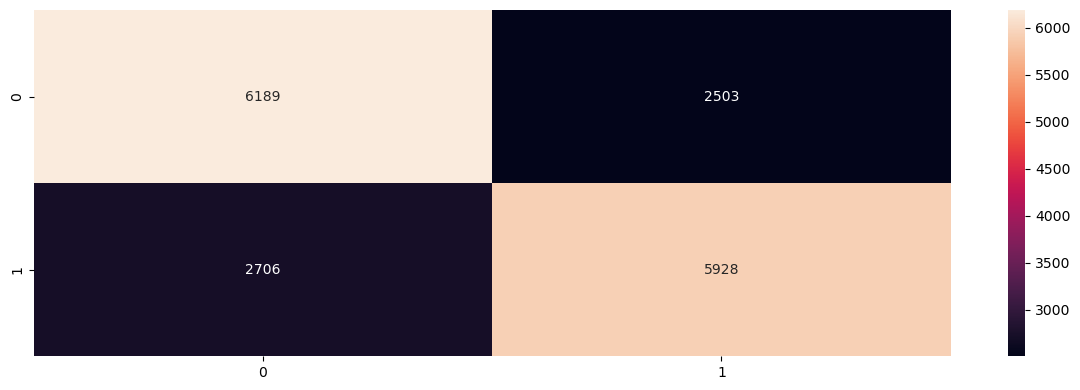

In [111]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_knn_pred),annot=True,fmt='d')

In [112]:
print('KNN Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_knn_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_knn_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(y_knn_pred,y_test))

KNN Classifier

 Confusion Matrix : 
 [[6189 2503]
 [2706 5928]]
Accuracy Score :  0.6993535726653585
Accuracy in Percentage :  69 %

               precision    recall  f1-score   support

           0       0.71      0.70      0.70      8895
           1       0.69      0.70      0.69      8431

    accuracy                           0.70     17326
   macro avg       0.70      0.70      0.70     17326
weighted avg       0.70      0.70      0.70     17326



# Random Forest with parameters tuning using RandomCV

In [113]:
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 70, num = 6)]
# Number of features to consider at every split
# max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 40, num = 7)]
# Minimum number of samples required to split a node
min_samples_split = [15,20,25,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [15,20,25,30]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# bootstrap = [True]
criterion = ["gini", "entropy"]

In [114]:
# Create the param distribution
param_dist = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                "criterion": criterion}
print(param_dist)

{'n_estimators': [40, 46, 52, 58, 64, 70], 'max_depth': [10, 15, 20, 25, 30, 35, 40], 'min_samples_split': [15, 20, 25, 30], 'min_samples_leaf': [15, 20, 25, 30], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [115]:
rf_Model = RandomForestClassifier(criterion = 'gini',random_state=20)

In [116]:
from sklearn.model_selection import RandomizedSearchCV
rf_randcv = RandomizedSearchCV(estimator= rf_Model,param_distributions=param_dist)
rf_randcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=20),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25, 30, 35,
                                                      40],
                                        'min_samples_leaf': [15, 20, 25, 30],
                                        'min_samples_split': [15, 20, 25, 30],
                                        'n_estimators': [40, 46, 52, 58, 64,
                                                         70]})

In [117]:
rf_randcv.best_params_

{'n_estimators': 52,
 'min_samples_split': 30,
 'min_samples_leaf': 25,
 'max_depth': 40,
 'criterion': 'entropy',
 'bootstrap': True}

In [123]:
rf_rcv_model = RandomForestClassifier(n_estimators = 52,
                                  max_depth=40,
                                  min_samples_leaf=30 ,
                                  min_samples_split=25,
                                  bootstrap= True,
                                  criterion = 'entropy',
                                  n_jobs = -1,random_state=20)
rf_rcv_model.fit(X_train,y_train)
yrf_rcv_pred = rf_rcv_model.predict(X_test)

<Axes: >

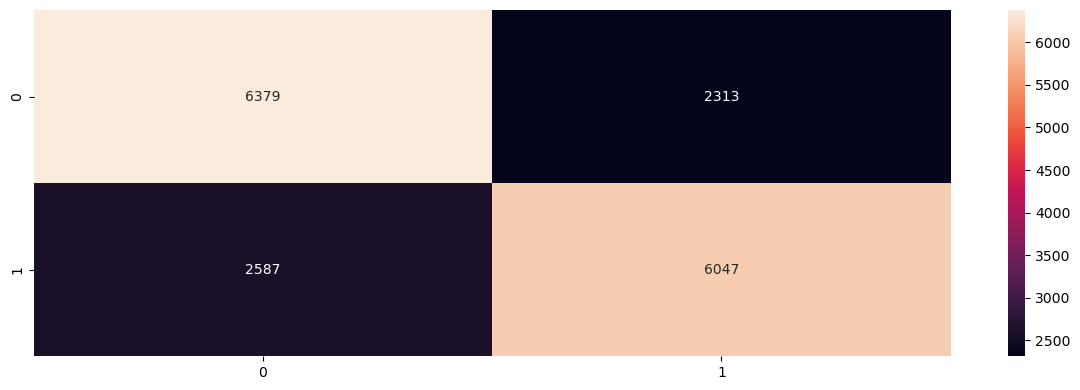

In [124]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(metrics.confusion_matrix(y_test,y_rf_pred),annot=True,fmt='d')

In [125]:
print('Random Forest with parameters tuning using RandomCV')
conf_mat=metrics.confusion_matrix(y_test, yrf_rcv_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,yrf_rcv_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',metrics.classification_report(yrf_rcv_pred,y_test))

Random Forest with parameters tuning using RandomCV

 Confusion Matrix : 
 [[6797 1895]
 [2630 6004]]
Accuracy Score :  0.7388318134595405
Accuracy in Percentage :  73 %

               precision    recall  f1-score   support

           0       0.78      0.72      0.75      9427
           1       0.70      0.76      0.73      7899

    accuracy                           0.74     17326
   macro avg       0.74      0.74      0.74     17326
weighted avg       0.74      0.74      0.74     17326



In [126]:
print (f'Train Accuracy - : {rf_randcv.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_randcv.score(X_test,y_test):.3f}');

Train Accuracy - : 0.751
Test Accuracy - : 0.739


# Showing the accuracy of every ML model

In [127]:
accuracy = {'RandomForestClassifier': metrics.accuracy_score(y_test,y_rf_pred),
            'RandomForest with parameter tuning RandomCV ': metrics.accuracy_score(y_test,yrf_rcv_pred),
            'GaussianNB': metrics.accuracy_score(y_test,y_naive_pred),
            'LogisticRegression': metrics.accuracy_score(y_test,y_log_pred),
            'SVC': metrics.accuracy_score(y_test,y_svc_pred),
            'KNeighborsClassifier': metrics.accuracy_score(y_test,y_knn_pred),
            'DecisionTreeClassifier': metrics.accuracy_score(y_test,y_tree_pred)
           }
for key,value in accuracy.items():
    print('The accuracy of ',key,'is :',np.round(value*100,2),'%')

The accuracy of  RandomForestClassifier is : 71.72 %
The accuracy of  RandomForest with parameter tuning RandomCV  is : 73.88 %
The accuracy of  GaussianNB is : 72.01 %
The accuracy of  LogisticRegression is : 70.7 %
The accuracy of  SVC is : 73.74 %
The accuracy of  KNeighborsClassifier is : 69.94 %
The accuracy of  DecisionTreeClassifier is : 63.19 %
